# Final Project - Word Cloud

### Importing all the Libraries

In [29]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\ProgramData\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\AYUSH\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\AYUSH\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\AYUSH\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


### Uploder Widget

In [34]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()    #It is the file where we are storing the string

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `hello.txt` (1.29 kB)


In [35]:
def calculate_frequencies(file_contents):
    
    # These are the punctuation marks which needs to be ignored while generating the word cloud
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    
    # These words are too frequent in any document and can be ignored.
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","in"]
    
    # This block of code is converting all the string to lowercase and removing the punctuations
    file_contents = file_contents.lower()
    final_string = ''
    for ch in file_contents:
        if ch not in punctuations: 
            final_string = final_string + ch
    lst = final_string.split()
    lst  = [word for word in lst if word not in uninteresting_words]
    
    dictionary = {}    #Initializing a empty dictionary
    
    # Storing the keys and values to a variable 
    for elements in lst:
        if elements in dictionary: 
            dictionary[elements] += 1
        else: 
            dictionary.update({elements: 1})

    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dictionary)
    return cloud.to_array()

### Displaying the Results

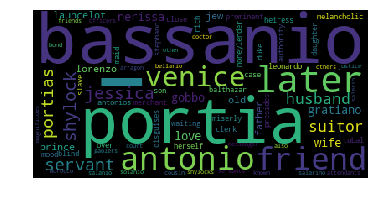

In [36]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
#plt.show()
plt.savefig('Matplotlib_save_plot.png')